### Zad1.  Dokładny opis danych, oraz ich źródło.

### Podstawowe statystyki i struktura danych

In [1]:
import pandas as pd

df = pd.read_csv("data/gym_members_exercise_tracking.csv")

df.head()

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                    3.5                              4                 3   
1                    2.1                              4                 2   
2                    2.3                              4                 2   
3                    2.1                              3                 1   
4                    2.8                              3                 1   

     BMI  
0  30.20  
1  32.00  
2  24.71  
3  18.41  
4  14.39

In [16]:
print("Struktura danych:")
df.dtypes

Struktura danych:


Age                                int64
Gender                            object
Weight (kg)                      float64
Height (m)                       float64
Max_BPM                            int64
Avg_BPM                            int64
Resting_BPM                        int64
Session_Duration (hours)         float64
Calories_Burned                  float64
Workout_Type                      object
Fat_Percentage                   float64
Water_Intake (liters)            float64
Workout_Frequency (days/week)      int64
Experience_Level                   int64
BMI                              float64
dtype: object

Zbiór danych zawiera 15 zmiennych, w tym:

- 11 zmiennych numerycznych (int64 i float64) – opisujących cechy fizyczne, parametry treningowe i zdrowotne, np. Age, Weight (kg), BMI, Calories_Burned.

- 2 zmienne kategoryczne nominalne – Gender, Workout_Type.

- 1 zmienna porządkowa – Experience_Level (poziom doświadczenia treningowego, kodowany liczbowo).

- 1 zmienna obliczona – BMI, wyliczona na podstawie wagi i wzrostu.

Zbiór danych pochodzi ze strony:
https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset

### Zad2. Estymacja parametrów rozkładu (punktowa) (średnia, odchylenie standardowe, odchylenie przeciętne, mediana, moda, wariancja, kurtoza, skośność, IQR, kwantyle, itp)

In [13]:
import pandas as pd
import numpy as np
from scipy.stats import median_abs_deviation

numeric_cols = df.select_dtypes(include=[np.number]).columns
numeric_df = df[numeric_cols]

def mean_abs_dev(x):
    return np.mean(np.abs(x - np.mean(x)))

basic_stats = numeric_df.describe()

additional_stats = pd.DataFrame({
    'mean': numeric_df.mean(),
    'std': numeric_df.std(),
    'mean_abs_dev': numeric_df.apply(mean_abs_dev),
    'median_abs_dev': median_abs_deviation(numeric_df),
    'median': numeric_df.median(),
    'mode': numeric_df.mode().iloc[0],
    'variance': numeric_df.var(),
    'skewness': numeric_df.skew(),
    'kurtosis': numeric_df.kurtosis(),
    'IQR': numeric_df.quantile(0.75) - numeric_df.quantile(0.25),
    'range': numeric_df.max() - numeric_df.min(),
    'min': numeric_df.min(),
    'max': numeric_df.max()
}).transpose()

full_stats = pd.concat([basic_stats, additional_stats.loc[~additional_stats.index.isin(basic_stats.index)]])
print("\nPełne statystyki dla danych liczbowych:")
full_stats


Pełne statystyki dla danych liczbowych:


Age  Weight (kg)  Height (m)     Max_BPM     Avg_BPM  \
count           973.000000   973.000000  973.000000  973.000000  973.000000   
mean             38.683453    73.854676    1.722580  179.883864  143.766701   
std              12.180928    21.207500    0.127720   11.525686   14.345101   
min              18.000000    40.000000    1.500000  160.000000  120.000000   
25%              28.000000    58.100000    1.620000  170.000000  131.000000   
50%              40.000000    70.000000    1.710000  180.000000  143.000000   
75%              49.000000    86.000000    1.800000  190.000000  156.000000   
max              59.000000   129.900000    2.000000  199.000000  169.000000   
mean_abs_dev     10.566815    16.971618    0.105898    9.982356   12.473965   
median_abs_dev   10.000000    13.400000    0.090000   10.000000   12.000000   
median           40.000000    70.000000    1.710000  180.000000  143.000000   
mode             43.000000    57.700000    1.620000  198.000000  132.000000   
variance        148.375004   449.758077    0.016312  132.841437  205.781935   
skewness         -0.077864     0.772384    0.338858   -0.037950    0.086361   
kurtosis         -1.215076    -0.023969   -0.723633   -1.187916   -1.198724   
IQR              21.000000    27.900000    0.180000   20.000000   25.000000   
range            41.000000    89.900000    0.500000   39.000000   49.000000   

                Resting_BPM  Session_Duration (hours)  Calories_Burned  \
count            973.000000                973.000000       973.000000   
mean              62.223022                  1.256423       905.422405   
std                7.327060                  0.343033       272.641516   
min               50.000000                  0.500000       303.000000   
25%               56.000000                  1.040000       720.000000   
50%               62.000000                  1.260000       893.000000   
75%               68.000000                  1.460000      1076.000000   
max               74.000000                  2.000000      1783.000000   
mean_abs_dev       6.326026                  0.270896       215.843011   
median_abs_dev     6.000000                  0.200000       178.000000   
median            62.000000                  1.260000       893.000000   
mode              50.000000                  1.030000       883.000000   
variance          53.685807                  0.117672     74333.396493   
skewness          -0.071636                  0.025761         0.278321   
kurtosis          -1.181466                 -0.350805        -0.056050   
IQR               12.000000                  0.420000       356.000000   
range             24.000000                  1.500000      1480.000000   

                Fat_Percentage  Water_Intake (liters)  \
count               973.000000             973.000000   
mean                 24.976773               2.626619   
std                   6.259419               0.600172   
min                  10.000000               1.500000   
25%                  21.300000               2.200000   
50%                  26.200000               2.600000   
75%                  29.300000               3.100000   
max                  35.000000               3.700000   
mean_abs_dev          5.038284               0.500273   
median_abs_dev        3.700000               0.500000   
median               26.200000               2.600000   
mode                 28.100000               3.500000   
variance             39.180324               0.360206   
skewness             -0.635225               0.071480   
kurtosis             -0.339019              -1.020298   
IQR                   8.000000               0.900000   
range                25.000000               2.200000   

                Workout_Frequency (days/week)  Experience_Level         BMI  
count                              973.000000        973.000000  973.000000  
mean                                 3.321686          1.809866   24.912127  
std   

#### Wyjaśnienie statystyk:
- mean - suma wszystkich wartości podzielona przez ich liczbę.
- std - odchylenienie standardowe - przeciętne oddalenie wartości od średniej.
- wariacja - średnia kwadratów odchyleń od średniej.
- mediana - wartość środkowa w uporządkowanym zbiorze danych.
- moda- wartość, która występuje najczęściej.
- MAD - odchylenie przeciętne - średnia z wartości bezwzględnych różnic względem średniej.
- skewness - skośność - miara asymetrii roskładu. Skośność = 0 - rozkład symetryczny. Skośność < 0 - wydłużony lewy ogon, Skośność>0 wydłużony prawy ogon rozkładu.
- kurtoza - pokazuje, jak bardzo dane są "spikowane" lub "spłaszczone" w porównaniu do rozkładu normalnego. Kurtoza = 0 - rozkład zbliżony do normalnego. Krutoza>0 - ogony są "ciężkie". Kurtoza<0 - ogony są lżejsze
- IQR - różnica między 3 a 1 kwartlem;

#### Ogólne wnioski
- Osoby dorosłe, głównie w wieku średnim.
- Waga typowa, ale z dużym rozrzutem – niektórzy mają otyłość.
- Przeciętny wzrost, niewielkie zróżnicowanie.
- Średnia bliska górnej granicy normy (25). Spora grupa ma nadwagę lub otyłość.

### Zad3. Estymacja parametrów (przedziałowa) (przedział ufności dla wariancji i dla średniej) oraz metoda nieparametryczna (bootstrap) dla średniej i porównanie

In [17]:
from scipy import stats

def calculate_confidence_intervals(data, confidence=0.95):
    results = {}
    for col in data.columns:
        n = len(data[col])
        mean = np.mean(data[col])
        std = np.std(data[col], ddof=1)
        sem = std / np.sqrt(n)

        t_crit = np.abs(stats.t.ppf((1-confidence)/2, n-1))
        mean_ci_lower = mean - t_crit * sem
        mean_ci_upper = mean + t_crit * sem

        chi2_lower = stats.chi2.ppf((1-confidence)/2, n-1)
        chi2_upper = stats.chi2.ppf(1-(1-confidence)/2, n-1)
        var_ci_lower = (n-1)*std**2 / chi2_upper
        var_ci_upper = (n-1)*std**2 / chi2_lower

        results[col] = {
            'Średnia': mean,
            'CI_średnia': (mean_ci_lower, mean_ci_upper),
            'Odchylenie_std': std,
            'Wariancja': std**2,
            'CI_wariancja': (var_ci_lower, var_ci_upper),
            'Rozmiar_próby': n
        }
    return pd.DataFrame(results).T

def bootstrap_mean(data, n_bootstrap=10000, confidence=0.95):
    bootstrap_results = {}
    for col in data.columns:
        bootstrap_means = []
        for _ in range(n_bootstrap):
            sample = np.random.choice(data[col], size=len(data[col]), replace=True)
            bootstrap_means.append(np.mean(sample))

        alpha = (1 - confidence) / 2
        ci_lower = np.percentile(bootstrap_means, 100 * alpha)
        ci_upper = np.percentile(bootstrap_means, 100 * (1 - alpha))

        bootstrap_results[col] = {
            'Średnia': np.mean(data[col]),
            'Bootstrap_CI': (ci_lower, ci_upper),
            'Bootstrap_std': np.std(bootstrap_means)
        }

        plt.figure()
        sns.histplot(bootstrap_means, kde=True)
        plt.axvline(x=ci_lower, color='red', linestyle='--')
        plt.axvline(x=ci_upper, color='red', linestyle='--')
        plt.title(f'Rozkład bootstrap dla średniej ({col})')
        plt.xlabel('Średnia')
        plt.ylabel('Częstość')
        plt.show()

    return pd.DataFrame(bootstrap_results).T

print("\nPRZEDZIAŁY UFNOŚCI - ESTYMACJA PARAMETRYCZNA")
parametric_ci = calculate_confidence_intervals(numeric_df)
parametric_ci


PRZEDZIAŁY UFNOŚCI - ESTYMACJA PARAMETRYCZNA


Średnia  \
Age                             38.683453   
Weight (kg)                     73.854676   
Height (m)                        1.72258   
Max_BPM                        179.883864   
Avg_BPM                        143.766701   
Resting_BPM                     62.223022   
Session_Duration (hours)         1.256423   
Calories_Burned                905.422405   
Fat_Percentage                  24.976773   
Water_Intake (liters)            2.626619   
Workout_Frequency (days/week)    3.321686   
Experience_Level                 1.809866   
BMI                             24.912127   

                                                             CI_średnia  \
Age                              (37.91712793608839, 39.44977853873175)   
Weight (kg)                      (72.52047213372519, 75.18888038426043)   
Height (m)                      (1.7145445494803184, 1.730614751650206)   
Max_BPM                          (179.1587615481757, 180.6089671260278)   
Avg_BPM                        (142.86422335488638, 144.66917849506225)   
Resting_BPM                      (61.76206233119916, 62.68398083426847)   
Session_Duration (hours)       (1.2348425450773268, 1.2780043202875242)   
Calories_Burned                  (888.2700094400477, 922.5748004263448)   
Fat_Percentage                 (24.582980943139276, 25.370564791701426)   
Water_Intake (liters)           (2.5888607488972872, 2.664376661174655)   
Workout_Frequency (days/week)  (3.2642439901589406, 3.3791270273127965)   
Experience_Level                (1.763330917671364, 1.8564018675290472)   
BMI                             (24.49307887053847, 25.331176011270372)   

                              Odchylenie_std     Wariancja  \
Age                                12.180928    148.375004   
Weight (kg)                          21.2075    449.758077   
Height (m)                           0.12772      0.016312   
Max_BPM                            11.525686    132.841437   
Avg_BPM                            14.345101    205.781935   
Resting_BPM                          7.32706     53.685807   
Session_Duration (hours)            0.343033      0.117672   
Calories_Burned                   272.641516  74333.396493   
Fat_Percentage                      6.259419     39.180324   
Water_Intake (liters)               0.600172      0.360206   
Workout_Frequency (days/week)       0.913047      0.833655   
Experience_Level                    0.739693      0.547145   
BMI                                 6.660879     44.367314   

                                                              CI_wariancja  \
Age                               (136.01924481180447, 162.50321923674431)   
Weight (kg)                       (412.30498742209954, 492.58388293626126)   
Height (m)                     (0.014953977383329079, 0.01786562973898784)   
Max_BPM                            (121.77921803969751, 145.4905516860127)   
Avg_BPM                            (188.6456797779966, 225.37641861960992)   
Resting_BPM                        (49.21518268496408, 58.797750514617356)   
Session_Duration (hours)        (0.10787296993827078, 0.12887665203443496)   
Calories_Burned                     (68143.36783923084, 81411.39629785404)   
Fat_Percentage                     (35.917627420143226, 42.91106079286725)   
Water_Intake (liters)           (0.33021058095179595, 0.39450507540272334)   
Workout_Frequency (days/week)     (0.7642331209877835, 0.9130350824965119)   
Experience_Level                   (0.5015824484802399, 0.599244340045135)   
BMI                               (40.672676895829305, 48.591954320089066)   

                              Rozmiar_próby  
Age                                     973  
Weight (kg)                             973  
Height (m)                              973  
Max_BPM                                 973  
Avg_BPM                                 973  
Resting_BPM                             973  
Session_Duration (hours)                973  
Calories_Burned       


PRZEDZIAŁY UFNOŚCI - METODA BOOTSTRAP


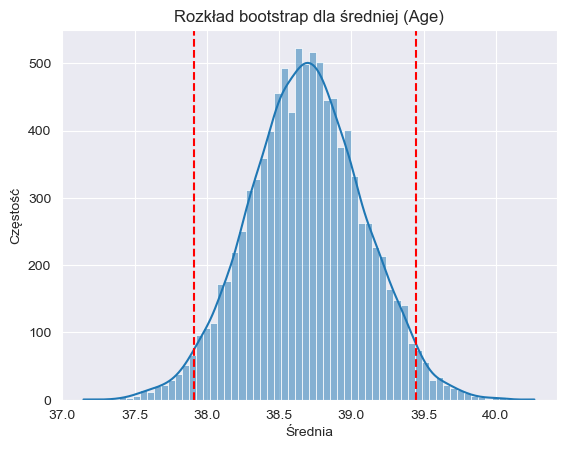

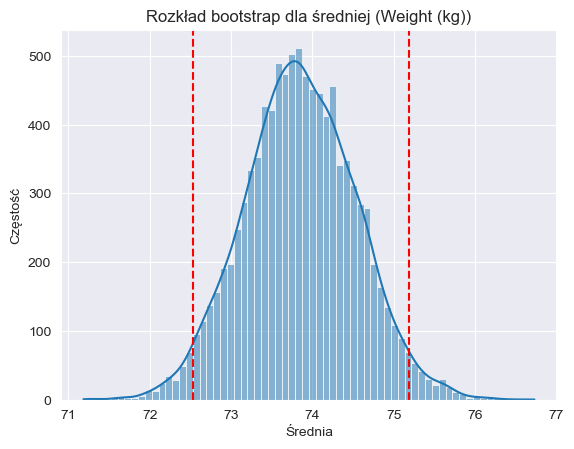

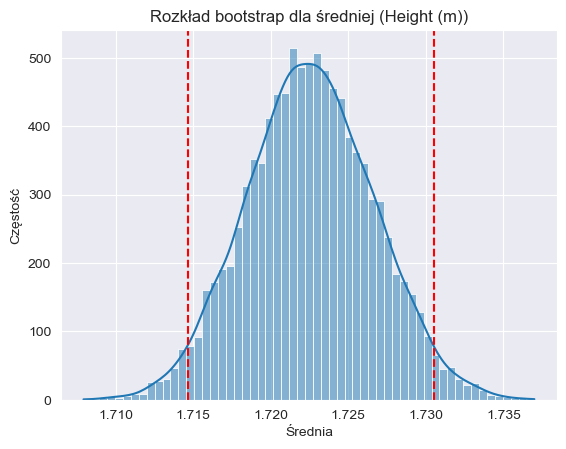

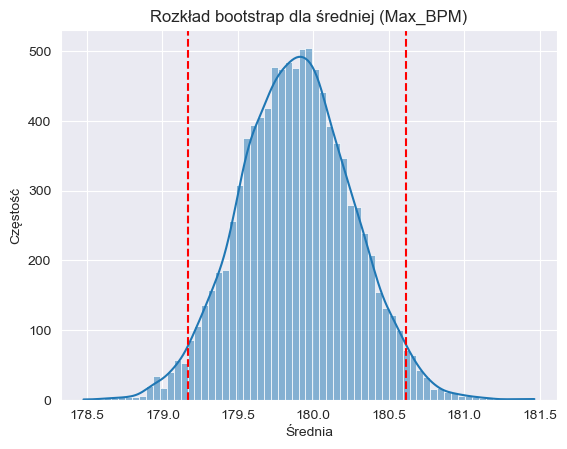

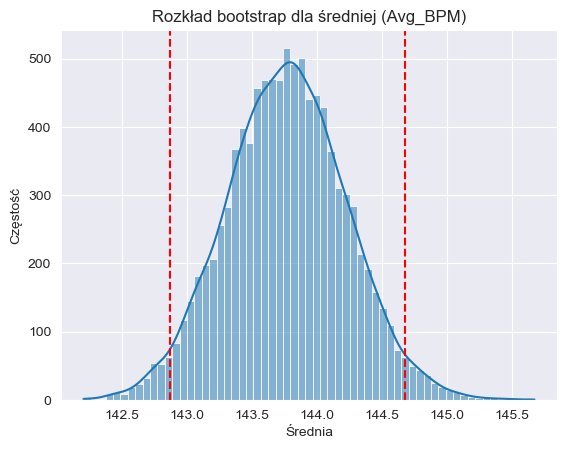

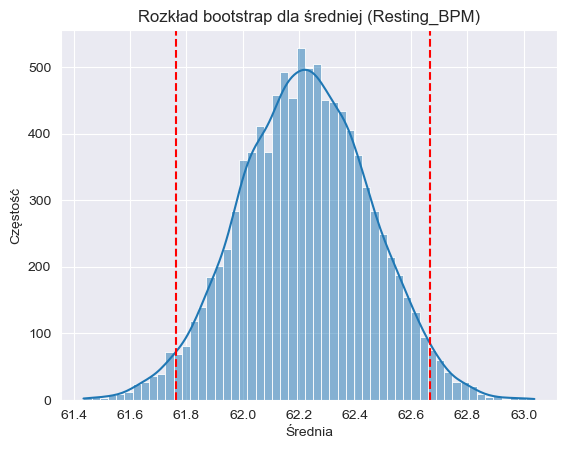

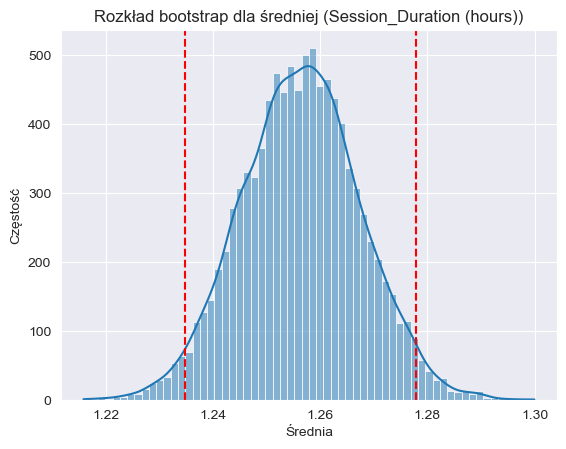

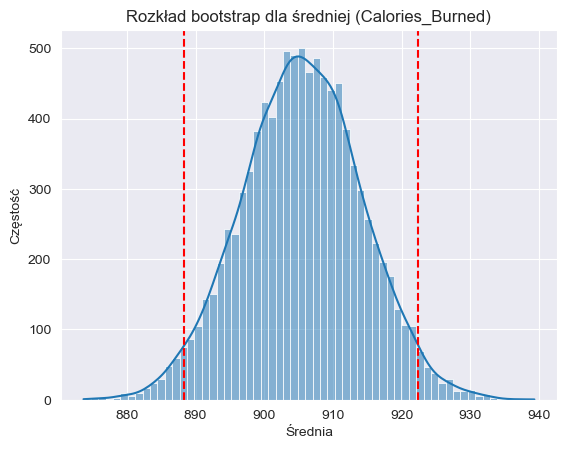

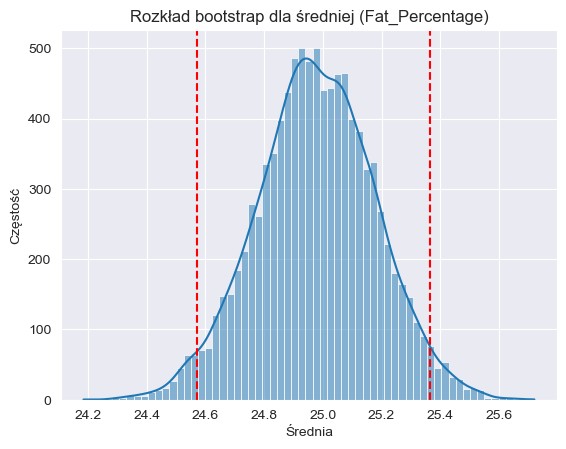

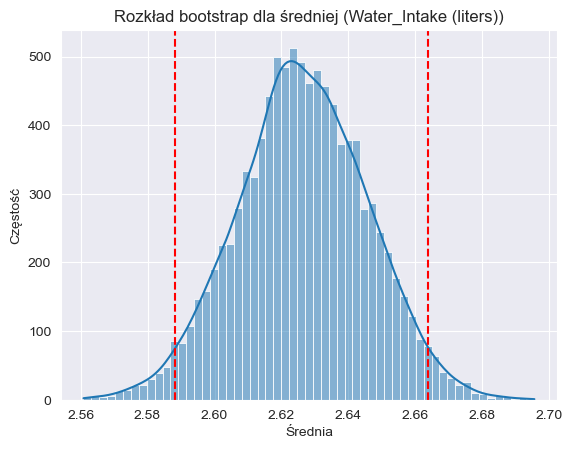

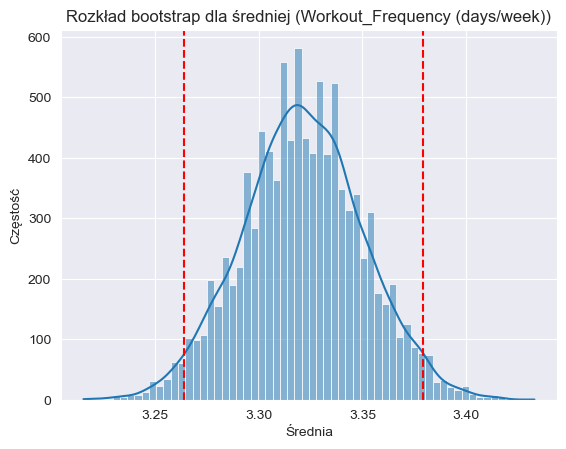

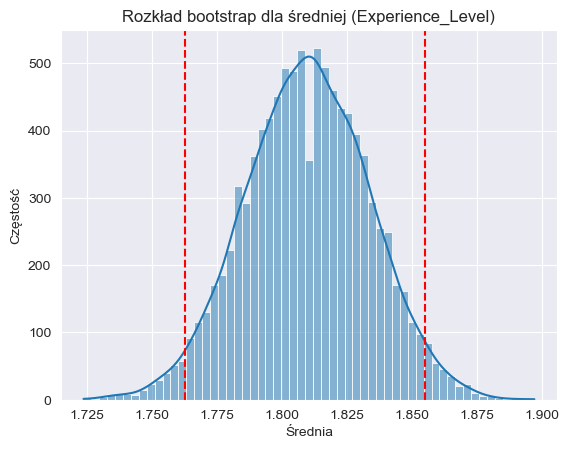

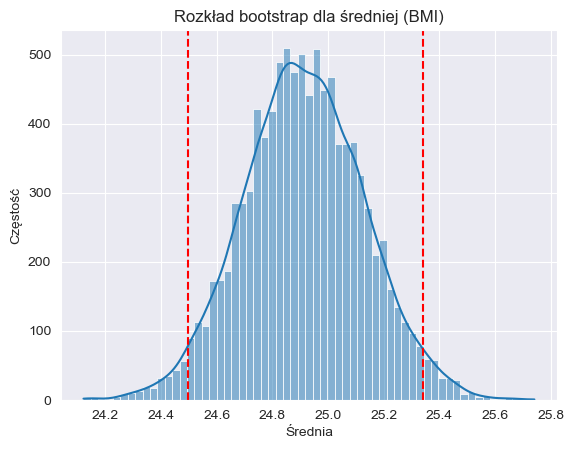

Średnia  \
Age                             38.683453   
Weight (kg)                     73.854676   
Height (m)                        1.72258   
Max_BPM                        179.883864   
Avg_BPM                        143.766701   
Resting_BPM                     62.223022   
Session_Duration (hours)         1.256423   
Calories_Burned                905.422405   
Fat_Percentage                  24.976773   
Water_Intake (liters)            2.626619   
Workout_Frequency (days/week)    3.321686   
Experience_Level                 1.809866   
BMI                             24.912127   

                                                           Bootstrap_CI  \
Age                              (37.91364337101747, 39.44912641315519)   
Weight (kg)                      (72.52661356628983, 75.19231500513874)   
Height (m)                     (1.7146454265159303, 1.7305246659815008)   
Max_BPM                        (179.17263617677287, 180.61562178828365)   
Avg_BPM                          (142.867394655704, 144.67936793422405)   
Resting_BPM                      (61.76361767728674, 62.66598150051387)   
Session_Duration (hours)       (1.2348509763617677, 1.2778214285714284)   
Calories_Burned                    (888.30352004111, 922.3140801644398)   
Fat_Percentage                 (24.569781603288796, 25.366495375128466)   
Water_Intake (liters)           (2.588281089414183, 2.6638232271325797)   
Workout_Frequency (days/week)    (3.264131551901336, 3.379239465570401)   
Experience_Level                (1.7625899280575539, 1.855087358684481)   
BMI                              (24.49532194244604, 25.34079599177801)   

                              Bootstrap_std  
Age                                0.393451  
Weight (kg)                        0.684053  
Height (m)                         0.004082  
Max_BPM                            0.369961  
Avg_BPM                            0.459271  
Resting_BPM                        0.230579  
Session_Duration (hours)           0.011028  
Calories_Burned                    8.691237  
Fat_Percentage                     0.200753  
Water_Intake (liters)              0.019331  
Workout_Frequency (days/week)      0.029025  
Experience_Level                   0.023811  
BMI                                0.215123

In [9]:
print("\nPRZEDZIAŁY UFNOŚCI - METODA BOOTSTRAP")
bootstrap_ci = bootstrap_mean(numeric_df)
bootstrap_ci

### Wyjaśnienie
Przedział ufności (ang. confidence interval, CI) to zakres wartości, który z pewnym prawdopodobieństwem (np. 95%) zawiera prawdziwy parametr populacji (np. średnią lub wariancję).

Estymacja teoretyczna:
Wykorzystuje własności teoretyczne rozkładów statystyk (np. rozkład t-Studenta dla średniej, chi-kwadrat dla wariancji). Zaletą są szybkie obliczenia przez wzory analityczne.

Estymacja nieparametryczna:
Opiera się na wielokrotnym losowaniu z powtórzeniami (resampling) z oryginalnej próby.

Na histogramach pokazane zostały częstości występowania różnych wartości średnich uzyskanych w próbach boostrapowych. Krzywa pokazuje kształt rozkładu średniuch. Pionowe czerwone granice wyznaczają przedział ufności.


#### Porównanie obu metod

In [19]:
comparison = []
for var in parametric_ci.index:
    row = {
        'Zmienna': var,
        'Średnia': parametric_ci.loc[var, 'Średnia'],
        'Parametryczna CI': f"{parametric_ci.loc[var, 'CI_średnia'][0]:.3f} - {parametric_ci.loc[var, 'CI_średnia'][1]:.3f}",
        'Bootstrap CI': f"{bootstrap_ci.loc[var, 'Bootstrap_CI'][0]:.3f} - {bootstrap_ci.loc[var, 'Bootstrap_CI'][1]:.3f}",
        'Różnica długości': abs((parametric_ci.loc[var, 'CI_średnia'][1] - parametric_ci.loc[var, 'CI_średnia'][0]) -
                             (bootstrap_ci.loc[var, 'Bootstrap_CI'][1] - bootstrap_ci.loc[var, 'Bootstrap_CI'][0])),
        'Zalecana metoda': ''
    }

    normality_pvalue = stats.shapiro(numeric_df[var])[1]
    if normality_pvalue > 0.05:
        row['Zalecana metoda'] = 'Parametryczna (dane normalne)'
    else:
        if abs(row['Różnica długości']) > 0.1 * (bootstrap_ci.loc[var, 'Bootstrap_CI'][1] - bootstrap_ci.loc[var, 'Bootstrap_CI'][0]):
            row['Zalecana metoda'] = 'Bootstrap (istotne różnice)'
        else:
            row['Zalecana metoda'] = 'Obie dobre (małe różnice)'

    comparison.append(row)

comparison_df = pd.DataFrame(comparison)
comparison_df

Zmienna     Średnia   Parametryczna CI  \
0                             Age   38.683453    37.917 - 39.450   
1                     Weight (kg)   73.854676    72.520 - 75.189   
2                      Height (m)    1.722580      1.715 - 1.731   
3                         Max_BPM  179.883864  179.159 - 180.609   
4                         Avg_BPM  143.766701  142.864 - 144.669   
5                     Resting_BPM   62.223022    61.762 - 62.684   
6        Session_Duration (hours)    1.256423      1.235 - 1.278   
7                 Calories_Burned  905.422405  888.270 - 922.575   
8                  Fat_Percentage   24.976773    24.583 - 25.371   
9           Water_Intake (liters)    2.626619      2.589 - 2.664   
10  Workout_Frequency (days/week)    3.321686      3.264 - 3.379   
11               Experience_Level    1.809866      1.763 - 1.856   
12                            BMI   24.912127    24.493 - 25.331   

         Bootstrap CI  Różnica długości            Zalecana metoda  
0     37.914 - 39.449          0.002832  Obie dobre (małe różnice)  
1     72.527 - 75.192          0.002707  Obie dobre (małe różnice)  
2       1.715 - 1.731          0.000191  Obie dobre (małe różnice)  
3   179.173 - 180.616          0.007220  Obie dobre (małe różnice)  
4   142.867 - 144.679          0.007018  Obie dobre (małe różnice)  
5     61.764 - 62.666          0.019555  Obie dobre (małe różnice)  
6       1.235 - 1.278          0.000191  Obie dobre (małe różnice)  
7   888.304 - 922.314          0.294231  Obie dobre (małe różnice)  
8     24.570 - 25.366          0.009130  Obie dobre (małe różnice)  
9       2.588 - 2.664          0.000026  Obie dobre (małe różnice)  
10      3.264 - 3.379          0.000225  Obie dobre (małe różnice)  
11      1.763 - 1.855          0.000574  Obie dobre (małe różnice)  
12    24.495 - 25.341          0.007377  Obie dobre (małe różnice)

### Zad4 Różne wykresy. Powinny być histogramy, wykresy kwantyl-kwantyl, boxplot i inne

### Analiza zmiennych liczbowych

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

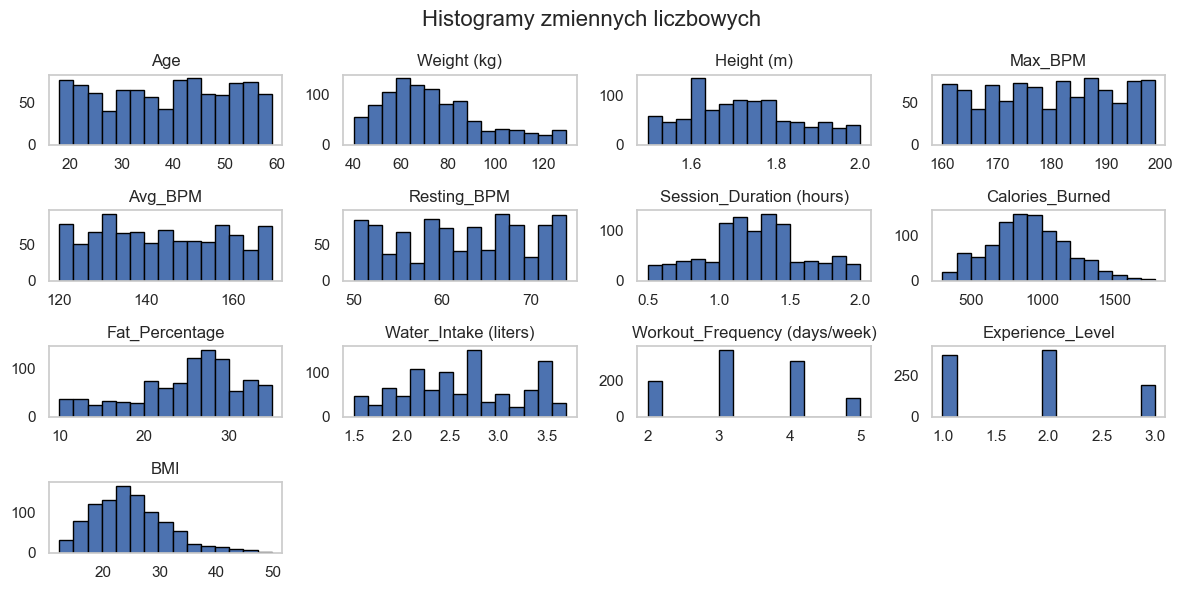

In [55]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

numeric_df.hist(bins=15, edgecolor='black', grid=False)
plt.suptitle("Histogramy zmiennych liczbowych", fontsize=16)
plt.tight_layout()
plt.show()


Histogram przedstawia rozkład wartości w zbiorze danych. Podstawowe informacje to:

- **Wysokość słupków**: liczba obserwacji w danym przedziale.
- **Rozkład**: czy dane są symetryczne, skośne, czy przypominają rozkład normalny.

Wnioski:
- Wiek/Max_BMP/AVG_BMP są dość równomiernie rozłożone.
- Większość osób waży między 55 a 80 kg. Rozkład lekko skośny w prawo.
- Seassion duration - szczyt wokół 1.2–1.5 godziny.
- Calories_Burned - przypomina rozkład normalny
- Water_Intake - szeroki rozkład od 1.5 do 3.5 litra

In [56]:
import plotly.express as px
for col in numeric_df.columns:
    fig = px.box(df, y=col, points="all", title=f"Boxplot: {col}")
    fig.show()

Boxplot pokazuje rozkład danych w sposób wizualny, umożliwiając ocenę:

- **Mediana** (środkowa linia w prostokącie): środkowa wartość zbioru danych.
- **Kwartyle** (górna i dolna krawędź prostokąta): dzielą dane na ćwiartki.
- **Wąsy**: reprezentują rozstęp pomiędzy 1. i 3. kwartylem (IQR), czyli rozstęp międzykwartylowy.
- **Wartości odstające**: punkty znajdujące się poza wąsami, które mogą być uznane za outliery.

#### Wnioski:
- Większość zmiennych liczbowych nie zawiera wartości odstających, co świadczy o dobrym zbalansowaniu danych.
- W przypadku BMI oraz Calories_burned zaobserwowano wartości odstające, które wykraczają poza zakres wąsów

In [57]:
fig = px.scatter(df, x="Session_Duration (hours)", y="Calories_Burned", color="Gender",
                 title="Session Duration vs Calories Burned")
fig.show()

fig = px.scatter(df, x="Weight (kg)", y="BMI", color="Gender",
                 title="Weight vs BMI")
fig.show()

fig = px.scatter(df, x="Height (m)", y="Weight (kg)", color="Gender",
                 title="Height vs Weight")
fig.show()

Scatterplot ilustruje związek między dwiema zmiennymi ilościowymi, co umożliwia:
- **Korelację**: kierunek zależności (dodatnia/ujemna).
- **Wartości odstające**: punkty odstające od głównej chmury punktów.

#### Wnioski:
- Diagramy scatterplot wykazały zależności liniowe między Session_Duration&Calories_Burned oraz Weight&BMI.
- Height&Weight - wykres jest bardziej zróżnicowane dla mężczyzn.

In [29]:
import plotly.graph_objects as go


numeric_df = df.select_dtypes(include=['float64', 'int64'])

corr = numeric_df.corr()

fig = go.Figure(data=go.Heatmap(
    z=corr.values,
    x=corr.columns,
    y=corr.index,
    colorscale='RdBu',
    zmin=-1, zmax=1,
    text=corr.values,
    hovertemplate='Korelacja: %{z}<extra></extra>'
))

fig.update_layout(title="Macierz korelacji")
fig.show()


### Macierz korelacji

Korelacja - statystyczna miara tego, jak bardzo dwie zmienne są ze sobą powiązane

Macierz korelacji - tabela, która pokazuje korelacje między wszystkimi parami zmiennych numerycznych w zbiorze danych.

Interpretacja:

1 - pełna dodatnia korelacja (zmienne rosną razem)

0 - brak związku liniowego

-1 - pełna ujemna korelacja (jedna rośnie, druga maleje)

### Wnioski
- Weight&BMI: bardzo silna korelacja dodatnia — wyższa masa ciała wiąże się z wyższym BMI.
- Experience_Level&Workout_Frequency - osoby z większym doświadczeniem częściej trenują.
- Workout_Frequency&Water_Intake: częstsze treningi wiążą się z większym spożyciem wody.
- Workout_Frequency&Calories_Burned: im częstsze treningi, tym większe spalanie kalorii.


 ### Analiza zmiennych kategorycznych

In [59]:
fig = px.pie(df, names="Gender", title="Udział procentowy: Gender")
fig.show()

fig = px.pie(df, names="Workout_Type", title="Udział procentowy: Workout Type")
fig.show()

fig = px.pie(df, names="Experience_Level", title="Udział procentowy: Experience Level")
fig.show()


Pie chart to wizualizacja rozkładu procentowego kategorii. Pokazuje:
- **Udział procentowy**: każda sekcja koła reprezentuje procentowy udział danej kategorii

### Relacje między zmiennymi

In [60]:
fig = px.violin(df, x="Workout_Type", y="Calories_Burned", box=True, points="all",
                title="Rozkład Calories Burned w różnych Workout Types")
fig.show()

fig = px.violin(df, x="Gender", y="BMI", box=True, points="all", title="Rozkład BMI według płci")
fig.show()

Violin plot łączy cechy boxplotu z gęstościami rozkładów. Wskazuje na:
- **Gęstość rozkładu** (kształt wykresu): pokazuje, gdzie występuje koncentracja danych.
- **Kwartyle**: przedstawiane w formie linii, podobnie jak w boxplot.
- **Wartości odstające**: mogą być widoczne jako punkty poza wykresem

In [61]:
import plotly.express as px

fig = px.violin(df, x="Workout_Type", y="Calories_Burned", color="Gender",
                box=True, points="all", facet_col="Gender", title="Rozkład Calories Burned w Workout Types według płci")
fig.show()


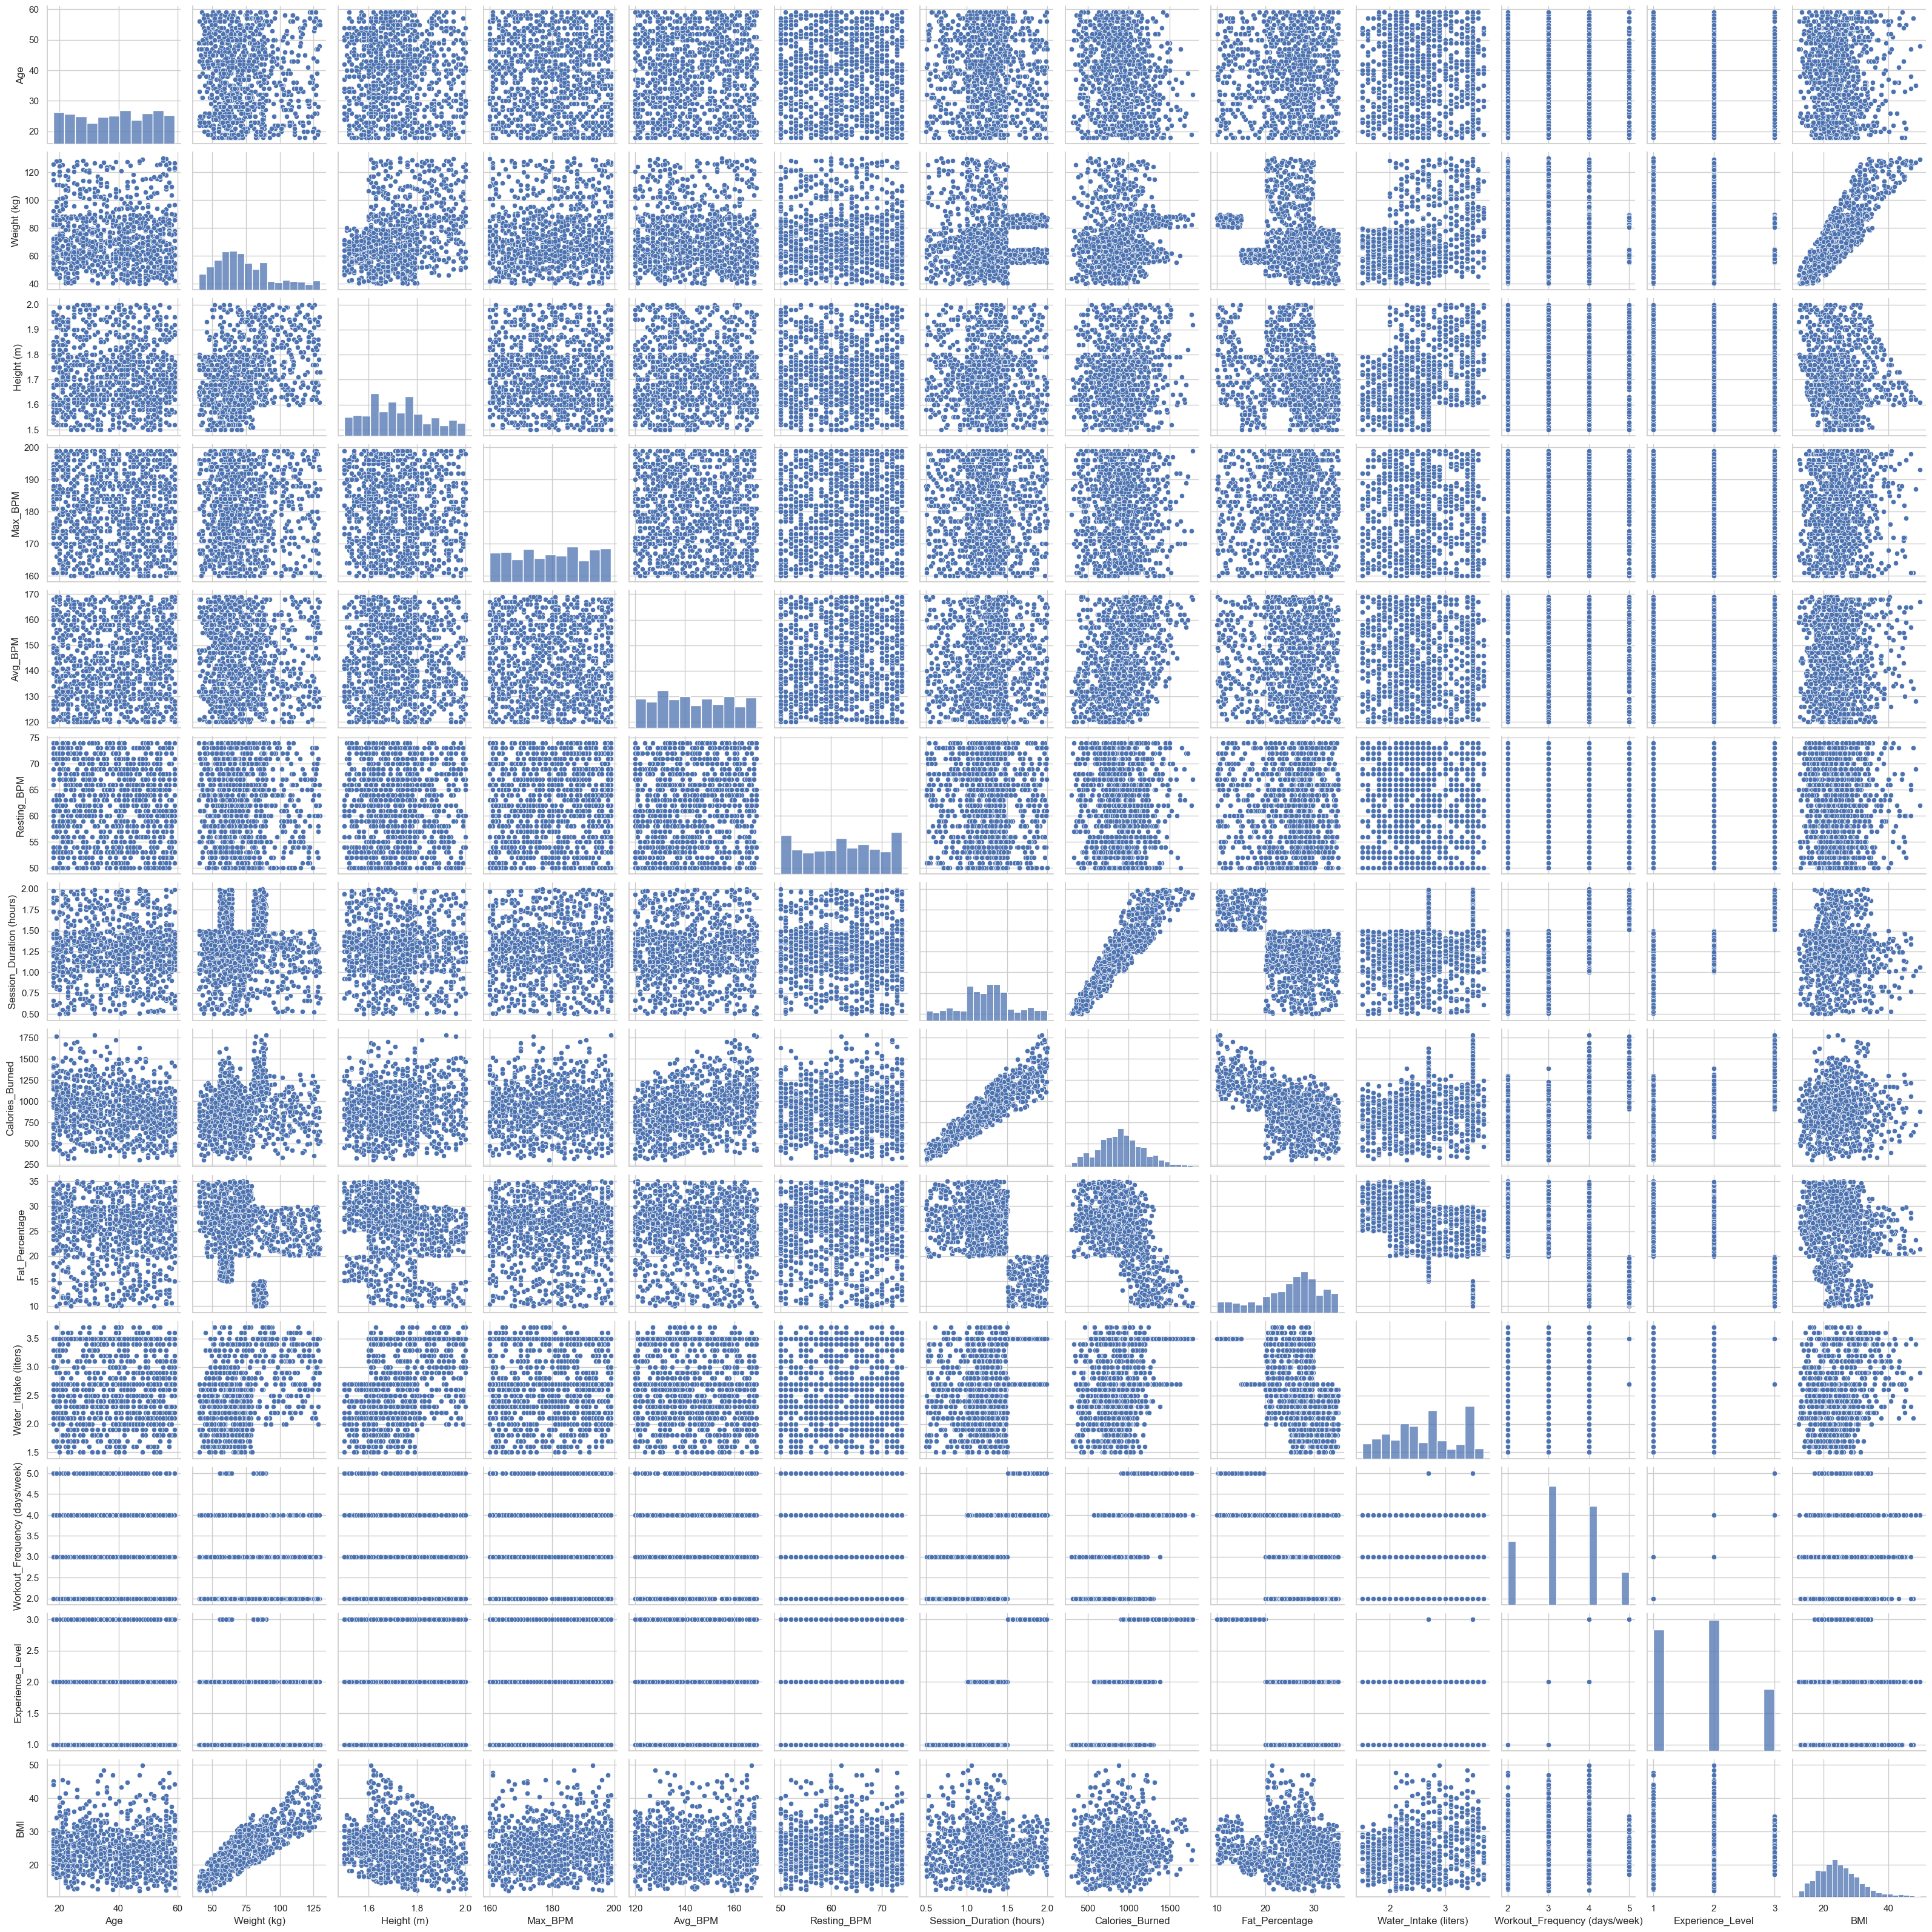

In [62]:
import seaborn as sns

sns.pairplot(numeric_df)


pairplot to macierz wykresów rozrzutu (scatter plots) pokazujących wszystkie możliwe pary zmiennych liczbowych w zbiorze danych.

### Zad5.Sprawdzenie czy rozkład (rozkłady) danych pochodzą z rozkładu normalnego.

In [24]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

normality_results = []

for col in numeric_cols:
    data = df[col].dropna()

    # Test Shapiro-Wilka
    if len(data) < 5000:
        shapiro_stat, shapiro_p = stats.shapiro(data)
    else:
        shapiro_stat, shapiro_p = np.nan, np.nan

    # Test D'Agostino-Pearson
    dagostino_stat, dagostino_p = stats.normaltest(data)

    skewness = stats.skew(data)
    kurtosis = stats.kurtosis(data)

    normality_results.append({
        'Zmienna': col,
        'Shapiro-Wilk p-value': shapiro_p,
        'D\'Agostino p-value': dagostino_p,
        'Skośność': skewness,
        'Kurtoza': kurtosis,
        'Normalność (Shapiro)': shapiro_p > 0.05 if not np.isnan(shapiro_p) else 'N/A',
        'Normalność (D\'Agostino)': dagostino_p > 0.05
    })

normality_df = pd.DataFrame(normality_results)
print("\nWyniki testów normalności:")
normality_df


Wyniki testów normalności:


Zmienna  Shapiro-Wilk p-value  D'Agostino p-value  \
0                             Age          1.467859e-17       8.840656e-176   
1                     Weight (kg)          6.716953e-19        1.115761e-17   
2                      Height (m)          2.158772e-13        1.058431e-16   
3                         Max_BPM          6.423399e-17       1.511784e-141   
4                         Avg_BPM          4.829162e-17       5.223965e-154   
5                     Resting_BPM          1.130085e-17       4.749541e-135   
6        Session_Duration (hours)          3.508750e-08        2.699206e-02   
7                 Calories_Burned          2.982494e-05        2.083039e-03   
8                  Fat_Percentage          6.902900e-18        2.386036e-14   
9           Water_Intake (liters)          8.096726e-17        3.259323e-51   
10  Workout_Frequency (days/week)          4.415551e-27        2.664622e-19   
11               Experience_Level          2.954526e-33        1.660699e-94   
12                            BMI          1.439641e-14        3.118226e-20   

    Skośność   Kurtoza  Normalność (Shapiro)  Normalność (D'Agostino)  
0  -0.077744 -1.215001                 False                    False  
1   0.771193 -0.030006                 False                    False  
2   0.338336 -0.726080                 False                    False  
3  -0.037892 -1.187980                 False                    False  
4   0.086228 -1.198733                 False                    False  
5  -0.071525 -1.181563                 False                    False  
6   0.025721 -0.355165                 False                    False  
7   0.277892 -0.061923                 False                    False  
8  -0.634245 -0.343440                 False                    False  
9   0.071370 -1.021223                 False                    False  
10  0.149584 -0.808124                 False                    False  
11  0.318022 -1.123508                 False                    False  
12  0.762470  0.733266                 False                    False

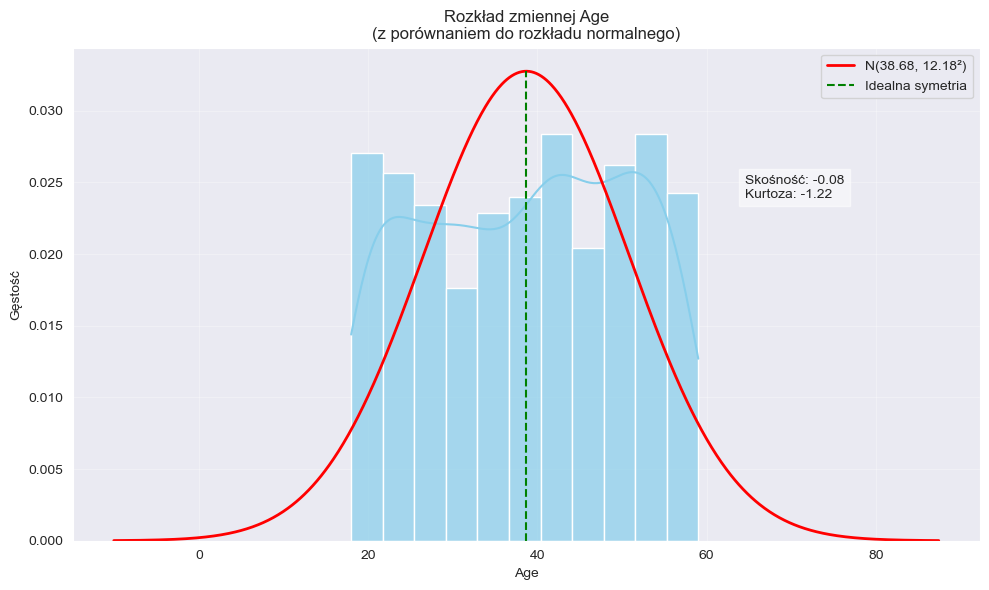

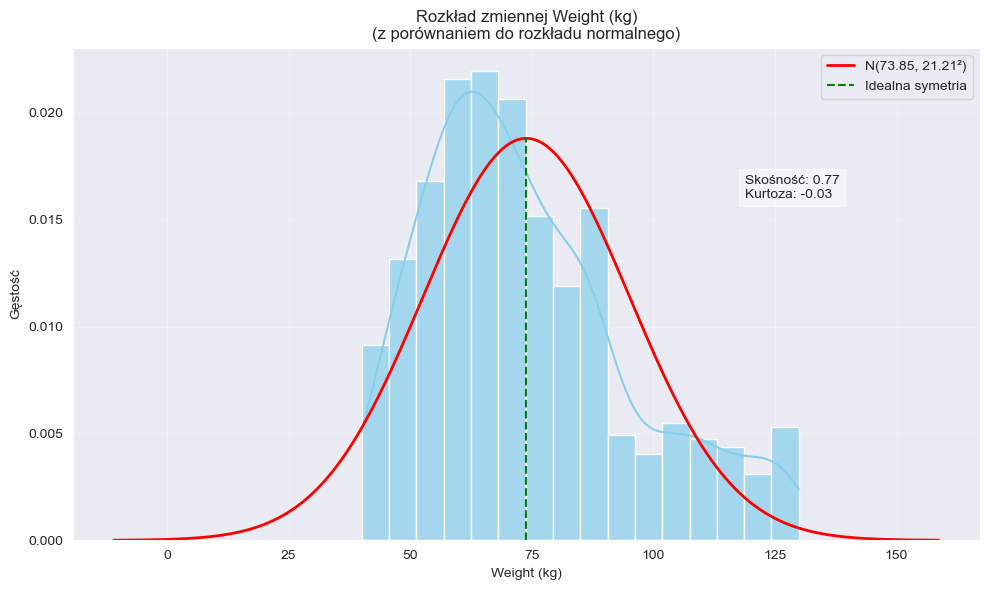

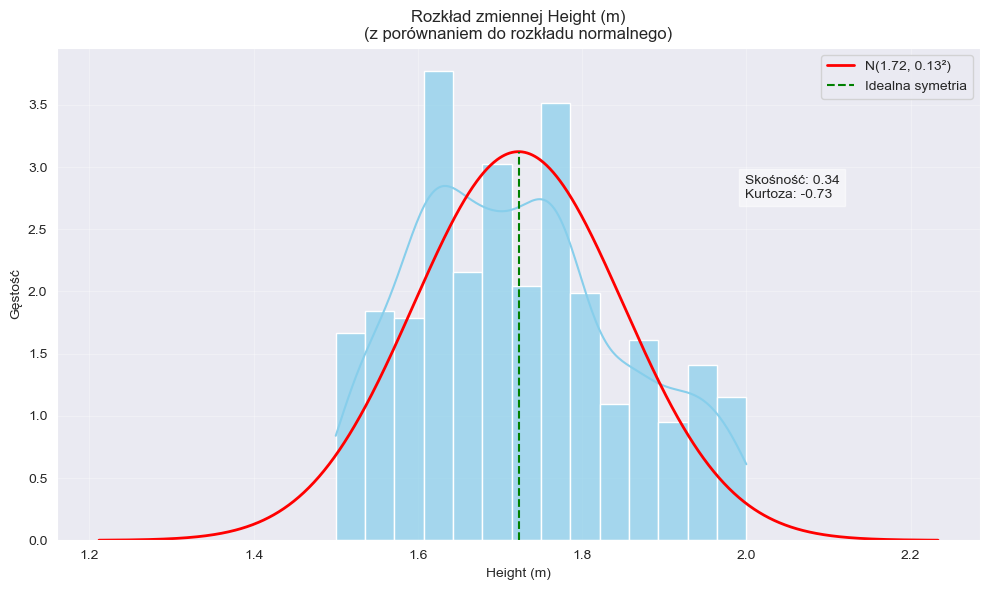

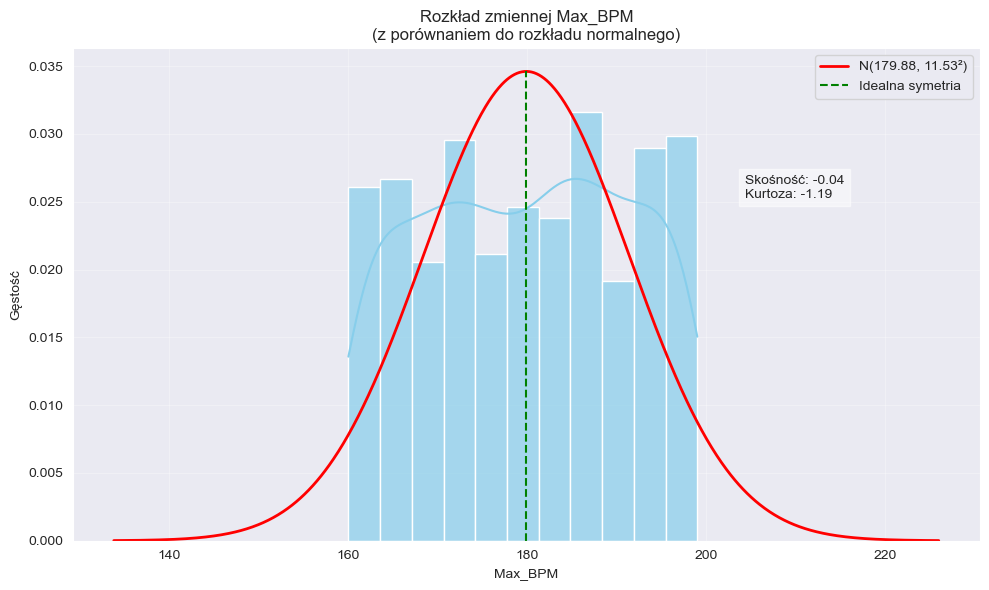

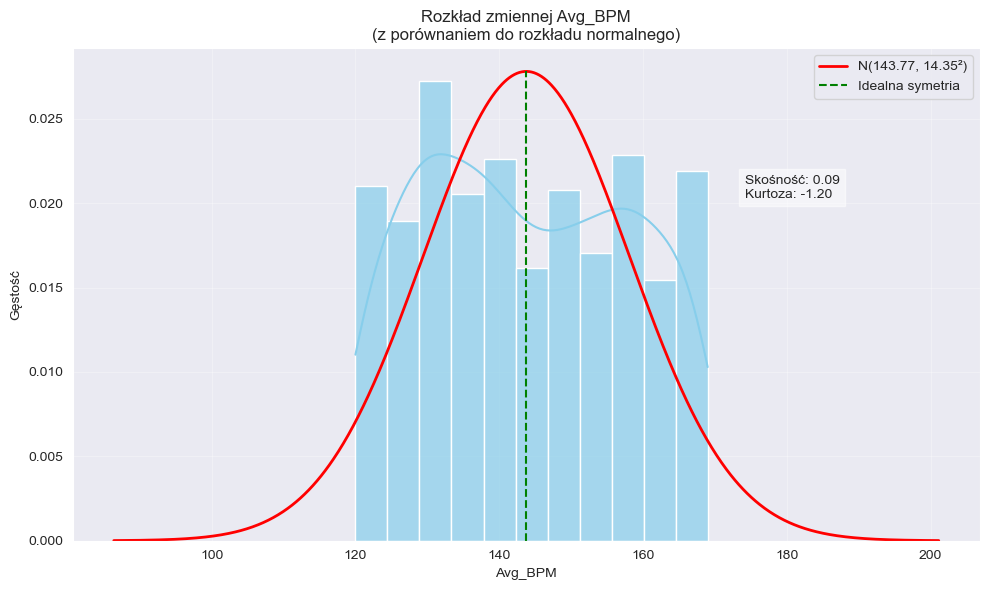

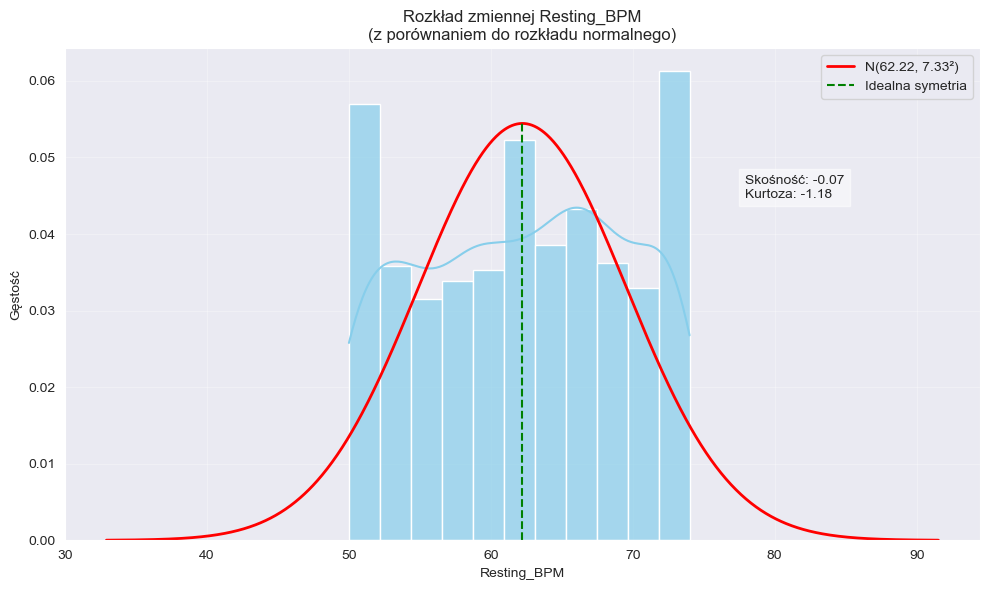

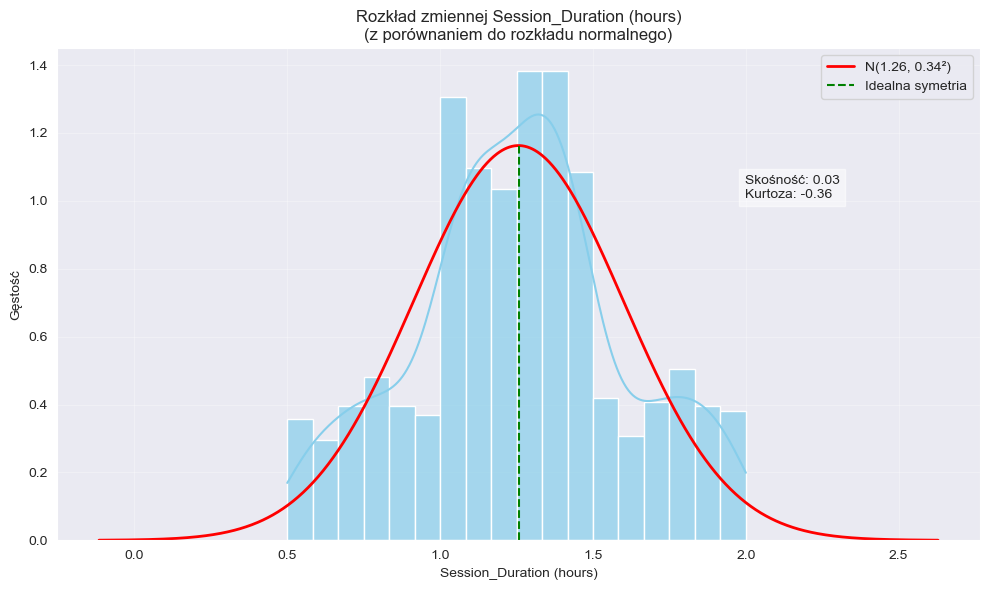

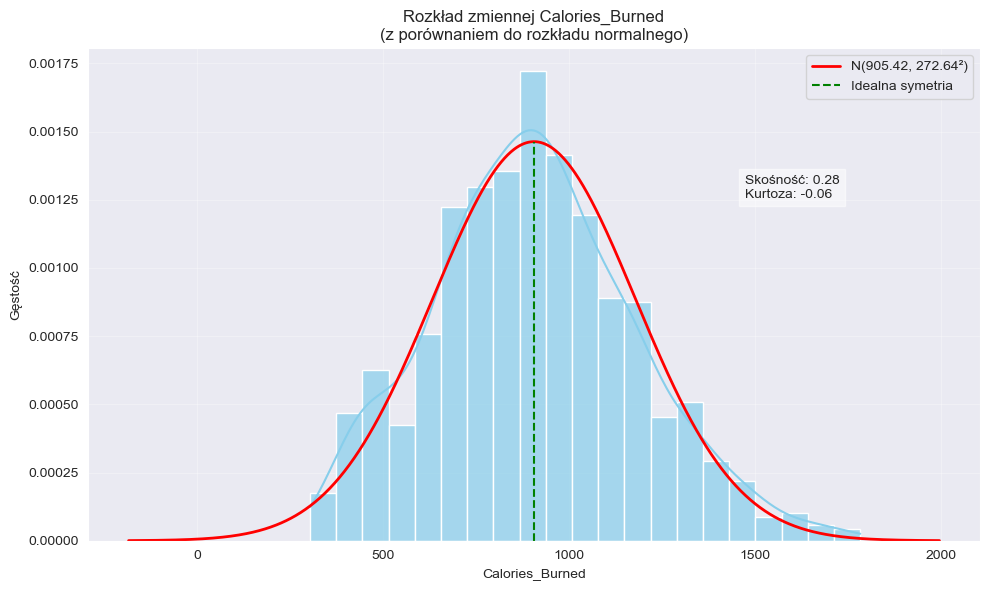

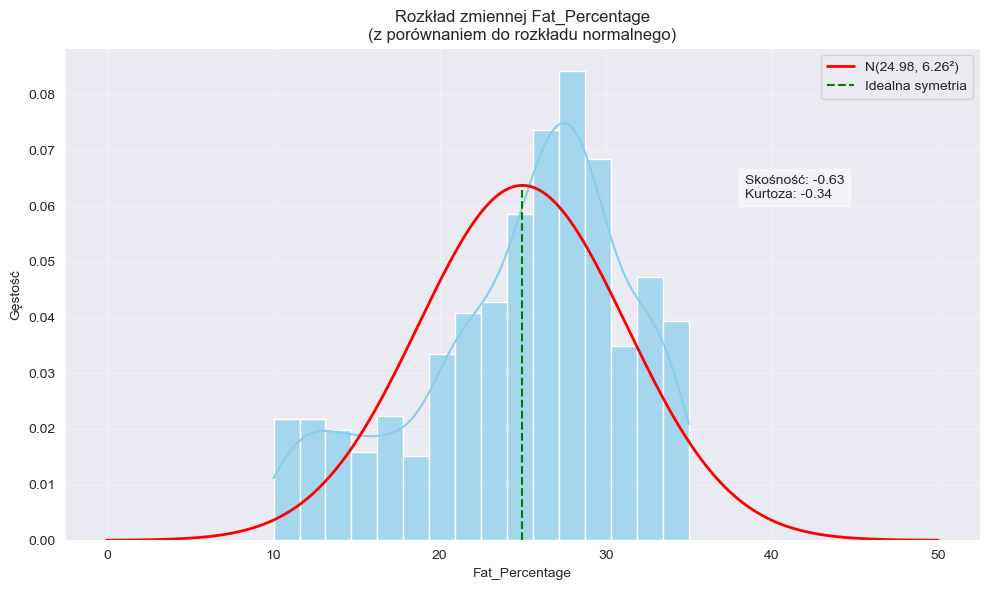

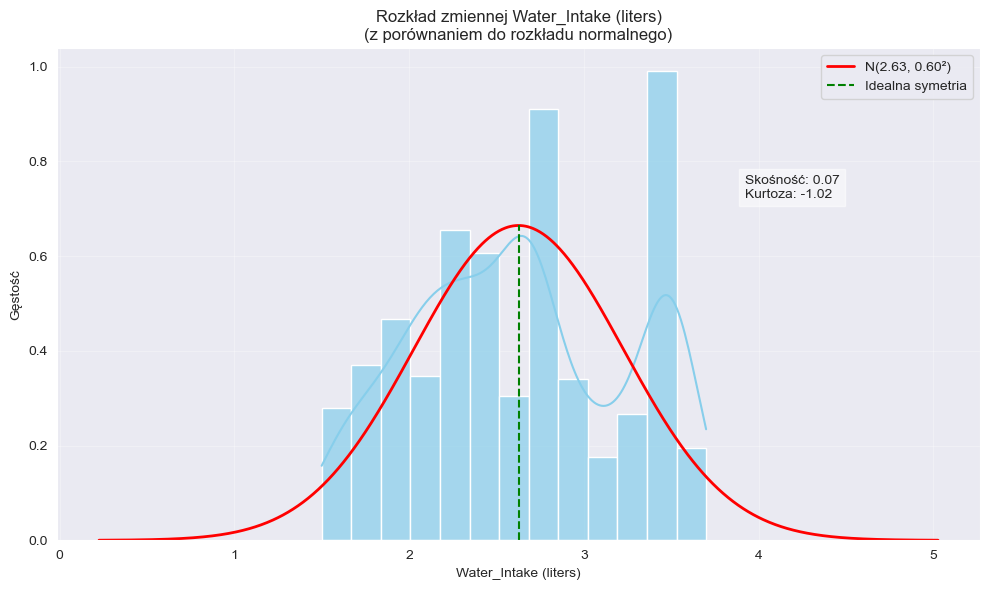

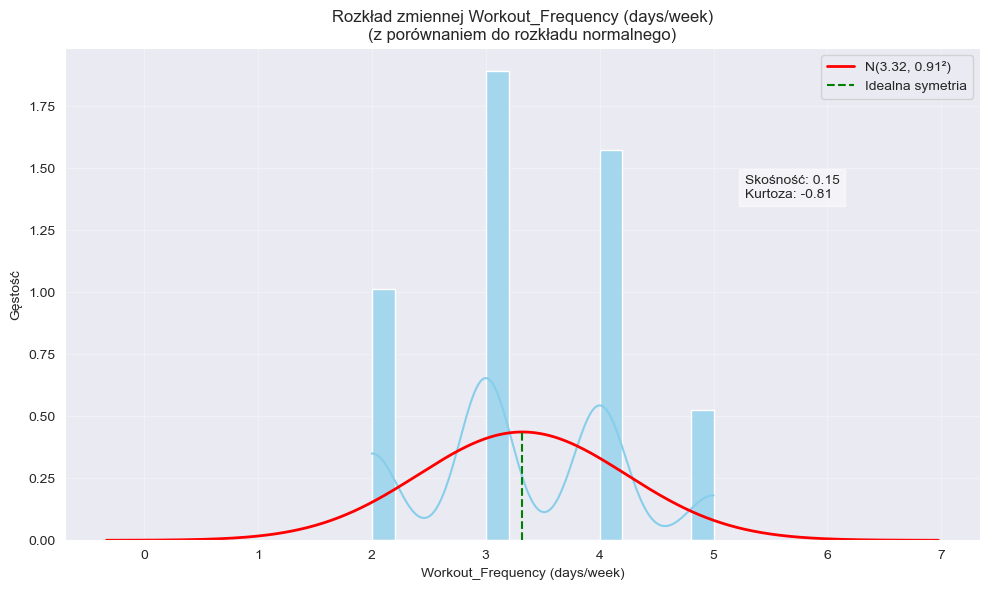

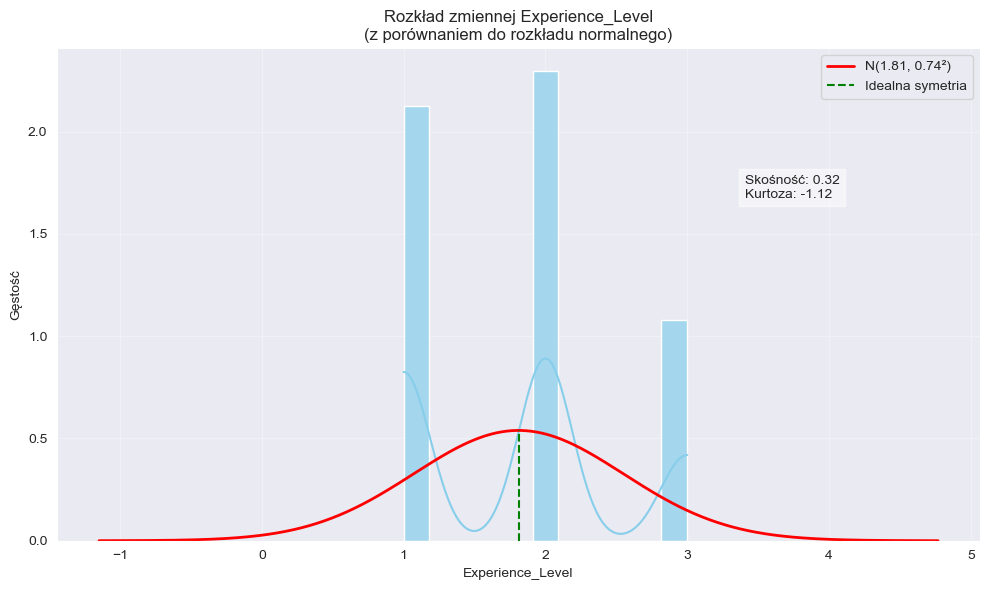

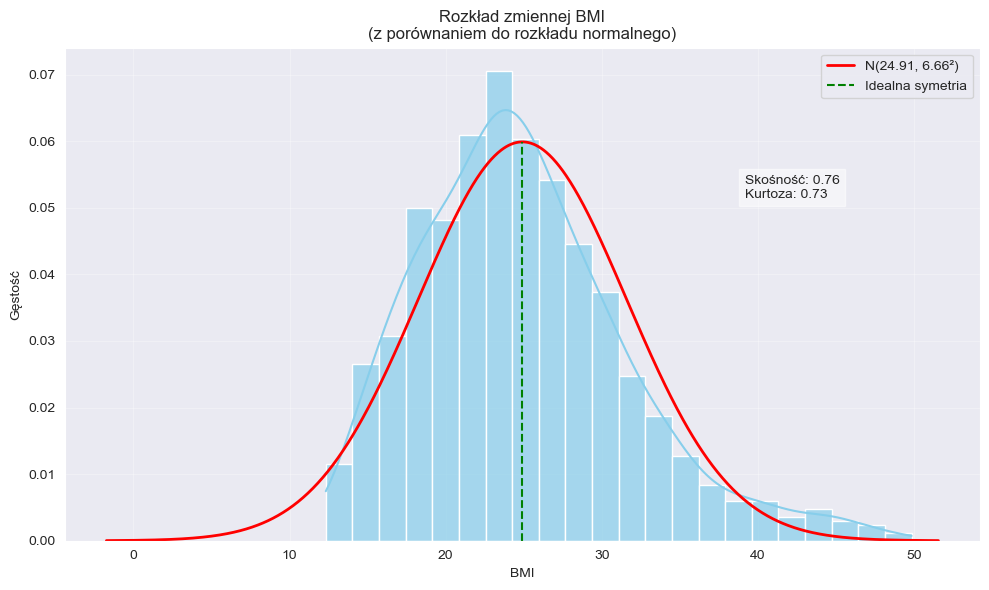

In [28]:
for col in numeric_cols:
    plt.figure(figsize=(10, 6))

    ax = sns.histplot(df[col], kde=True, stat='density', color='skyblue', alpha=0.7)

    mu, sigma = df[col].mean(), df[col].std()
    x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
    plt.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', lw=2,
             label=f'N({mu:.2f}, {sigma:.2f}²)')

    ymin, ymax = ax.get_ylim()
    plt.vlines(mu, ymin, stats.norm.pdf(mu, mu, sigma),
               colors='green', linestyles='dashed',
               label='Idealna symetria')

    plt.title(f'Rozkład zmiennej {col}\n(z porównaniem do rozkładu normalnego)')
    plt.xlabel(col)
    plt.ylabel('Gęstość')
    plt.legend()
    plt.grid(True, alpha=0.3)

    skew = stats.skew(df[col].dropna())
    kurt = stats.kurtosis(df[col].dropna())

    textstr = '\n'.join((
        f'Skośność: {skew:.2f}',
        f'Kurtoza: {kurt:.2f}'))

    plt.gcf().text(0.75, 0.7, textstr, bbox=dict(facecolor='white', alpha=0.5),
                  fontsize=10, verticalalignment='top')

    plt.tight_layout()
    plt.show()

#### Wyjaśnienie:
- Test Shapiro-Wilka - Testuje hipotezę zerową, że dane pochodzą z rozkładu normalnego. p-value > 0.05: brak dowodów przeciw normalności
- Test D'Agostino-Pearsona. Łączy testy skośności i kurtozy. Skośność ~0 i kurtoza ~0 sugerują normalność.

### Zad6. Wykorzystanie testu statystycznego dla średniej i wariancji

In [44]:
import numpy as np
from scipy import stats

reference_values = {
    'Height (m)': {'mu0': 1.70, 'var0': 0.01},
    'BMI': {'mu0': 25, 'var0': 25},
    'Age': {'mu0': 30, 'var0': 100},
    'Weight (kg)': {'mu0': 70, 'var0': 225},
    'Resting_BPM': {'mu0': 70, 'var0': 100}
}

print("TEST dla średniej i chi dla wariancji\n" + "="*45)

for col, refs in reference_values.items():
    if col not in numeric_df.columns:
        continue

    data = numeric_df[col].dropna()
    n = len(data)

    mu0 = refs['mu0']
    t_stat, p_val_t = stats.ttest_1samp(data, popmean=mu0)
    conclusion_t = "ODRZUCAMY H0" if p_val_t < 0.05 else "BRAK PODSTAW DO ODRZUCENIA H0"

    sigma0_sq = refs['var0']
    s_sq = data.var(ddof=1)
    chi2_stat = (n - 1) * s_sq / sigma0_sq
    p_val_chi2 = 2 * min(stats.chi2.cdf(chi2_stat, n-1), 1 - stats.chi2.cdf(chi2_stat, n-1))
    conclusion_chi2 = "ODRZUCAMY H0" if p_val_chi2 < 0.05 else "BRAK PODSTAW DO ODRZUCENIA H0"

    print(f"Zmienna: {col}")
    print(f"Średnia próby: {data.mean():.4f} | u0: {mu0}")
    print(f"t = {t_stat:.4f}, p = {p_val_t:.4f} - {conclusion_t} (czy średnia = {mu0})")

    print(f"Wariancja próby: {s_sq:.4f} | o2: {sigma0_sq}")
    print(f"χ² = {chi2_stat:.4f}, p = {p_val_chi2:.4f} - {conclusion_chi2} (czy wariancja = {sigma0_sq})")


TEST t dla średniej i chi dla wariancji
Zmienna: Height (m)
Średnia próby: 1.7226 | u0: 1.7
t = 5.5146, p = 0.0000 - ODRZUCAMY H0 (czy średnia = 1.7)
Wariancja próby: 0.0163 | o2: 0.01
χ² = 1585.5625, p = 0.0000 - ODRZUCAMY H0 (czy wariancja = 0.01)
Zmienna: BMI
Średnia próby: 24.9121 | u0: 25
t = -0.4115, p = 0.6808 - BRAK PODSTAW DO ODRZUCENIA H0 (czy średnia = 25)
Wariancja próby: 44.3673 | o2: 25
χ² = 1725.0012, p = 0.0000 - ODRZUCAMY H0 (czy wariancja = 25)
Zmienna: Age
Średnia próby: 38.6835 | u0: 30
t = 22.2366, p = 0.0000 - ODRZUCAMY H0 (czy średnia = 30)
Wariancja próby: 148.3750 | o2: 100
χ² = 1442.2050, p = 0.0000 - ODRZUCAMY H0 (czy wariancja = 100)
Zmienna: Weight (kg)
Średnia próby: 73.8547 | u0: 70
t = 5.6696, p = 0.0000 - ODRZUCAMY H0 (czy średnia = 70)
Wariancja próby: 449.7581 | o2: 225
χ² = 1942.9549, p = 0.0000 - ODRZUCAMY H0 (czy wariancja = 225)
Zmienna: Resting_BPM
Średnia próby: 62.2230 | u0: 70
t = -33.1084, p = 0.0000 - ODRZUCAMY H0 (czy średnia = 70)
Wariancj

#### Wyjaśnienie
- Wykonywane są dwa różne testy statystyczne
- Test t dla średniej populacji - służy do sprawdzenia, czy średnia z próby jest istotnie różna od hipotetycznej lub znanej wartości średniej populacji
- Test chi-kwadrat dla wariancji  służy do sprawdzenia, czy wariancja populacji jest równa hipotetycznej wartości lub różni się od niej istotnie.

### zad7. Estymator jądrowy gęstości.

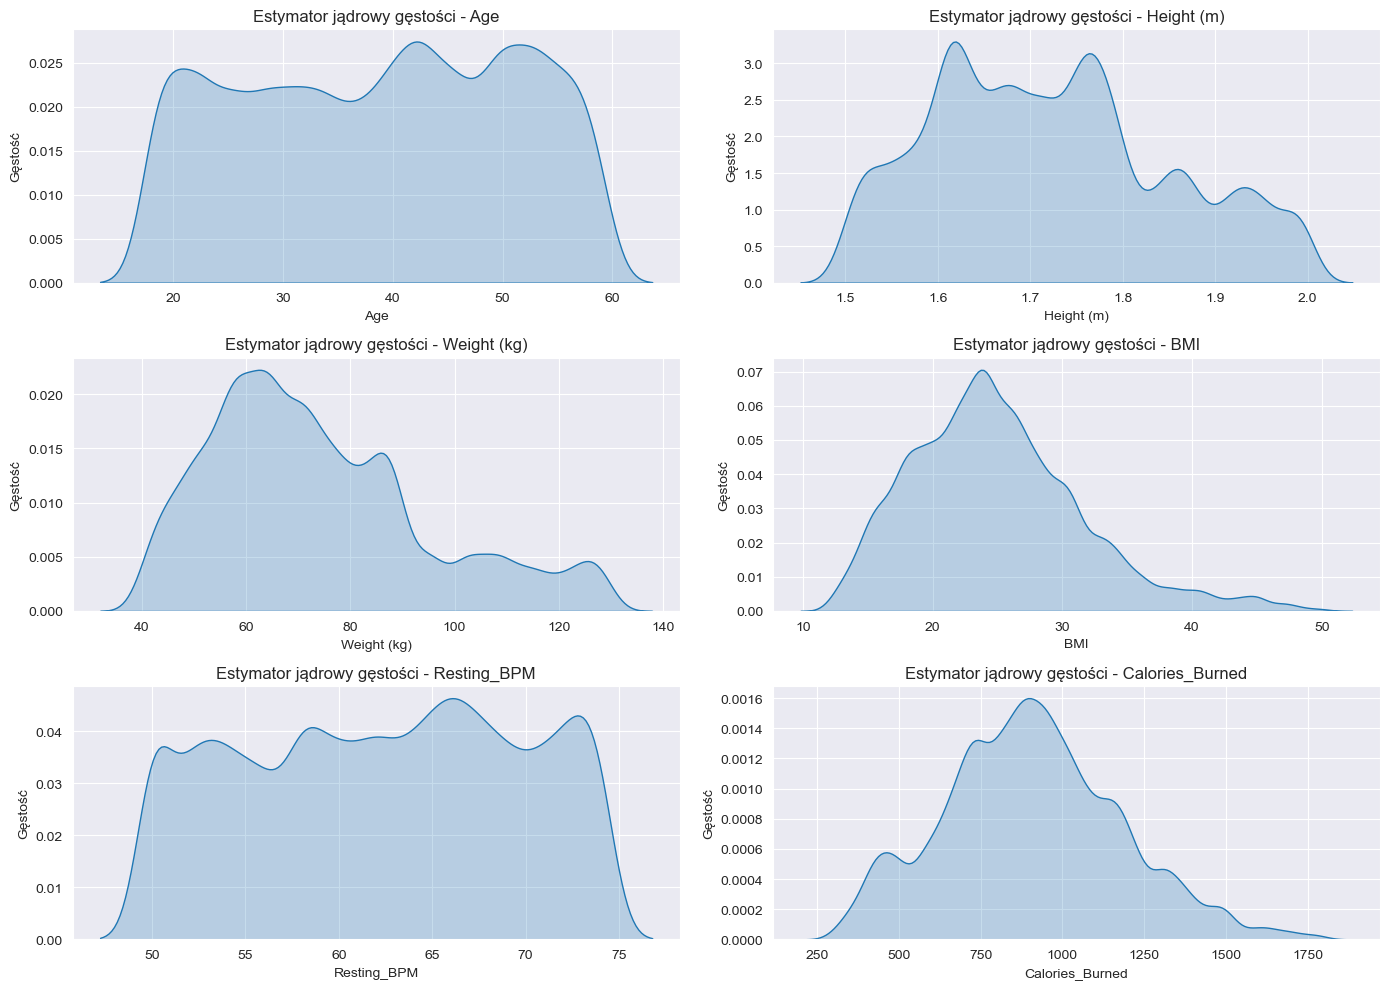

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_columns = ['Age', 'Height (m)', 'Weight (kg)', 'BMI', 'Resting_BPM', 'Calories_Burned']

plt.figure(figsize=(14, 10))

for i, col in enumerate(selected_columns, 1):
    plt.subplot(3, 2, i)
    sns.kdeplot(data=numeric_df[col].dropna(), fill=True, bw_adjust=0.5)
    plt.title(f'Estymator jądrowy gęstości - {col}')
    plt.xlabel(col)
    plt.ylabel('Gęstość')

plt.tight_layout()
plt.show()


#### Wyjaśnienie:
- Estymator jądrowy gęstości (Kernel Density Estimation, KDE) to nieparametryczna metoda estymacji funkcji gęstości prawdopodobieństwa na podstawie próbki danych. W przeciwieństwie do histogramu, który grupuje dane w przedziałach, KDE zapewnia płynną i ciągłą estymację gęstości, co pozwala lepiej uchwycić strukturę danych.